In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
# file_path = 'C:/Users/Gina/Pictures/md/heart_attack_prediction_indonesia.csv'
file_path = './heart_attack_prediction_indonesia.csv' # Path to the dataset
TARGET = "heart_attack"
data = pd.read_csv(
    file_path,
    sep = ',',
    na_values = "."
)

print(f"Originally we have {data.shape[0]} samples and {data.shape[1]} features.")  # Shape returns (nº samples, nº features)
#print(data.describe())
#data.head()

n_samples = 20000
df = data.sample(n=n_samples)
print(f"For this project we have {df.shape[0]} samples and {df.shape[1]} features.")
print(df.describe())
df.head()

Originally we have 158355 samples and 28 features.
For this project we have 20000 samples and 28 features.
                age  hypertension      diabetes  cholesterol_level  \
count  20000.000000  20000.000000  20000.000000       20000.000000   
mean      54.531550      0.297100      0.197400         199.185100   
std       11.907195      0.456992      0.398047          39.947344   
min       25.000000      0.000000      0.000000         100.000000   
25%       46.000000      0.000000      0.000000         172.000000   
50%       55.000000      0.000000      0.000000         199.000000   
75%       63.000000      1.000000      0.000000         227.000000   
max       90.000000      1.000000      1.000000         350.000000   

            obesity  waist_circumference  family_history   sleep_hours  \
count  20000.000000         20000.000000    20000.000000  20000.000000   
mean       0.249600            93.367800        0.294400      6.480324   
std        0.432792            16.266181

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
22265,53,Male,Urban,Middle,0,0,158,1,99,0,...,89,164,48,202,164,Abnormal,0,0,1,1
128501,47,Female,Rural,Low,1,0,231,0,100,1,...,59,124,63,114,210,Normal,0,1,1,0
18232,41,Male,Urban,Middle,0,0,159,1,132,0,...,87,105,55,145,188,Normal,0,0,1,0
36677,76,Female,Rural,High,1,0,278,0,75,0,...,82,123,50,215,139,Normal,0,1,1,0
81985,69,Female,Rural,Middle,0,0,193,0,79,0,...,68,70,35,155,188,Normal,0,0,1,1


## Uni-variate Descriptive Analysis

In [4]:
df.describe(include = "all")

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
count,20000.000000,20000,20000,20000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000,20000.000000,20000.000000,20000.000000,20000.00000
unique,NaN,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,Male,Urban,Middle,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Normal,NaN,NaN,NaN,NaN
freq,NaN,10372,13084,8991,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16064,NaN,NaN,NaN,NaN
mean,54.531550,NaN,NaN,NaN,0.297100,0.197400,199.185100,0.249600,93.367800,0.294400,...,79.523250,110.614400,49.531550,129.302650,149.468750,NaN,0.201600,0.498150,0.603600,0.39480
std,11.907195,NaN,NaN,NaN,0.456992,0.398047,39.947344,0.432792,16.266181,0.455784,...,9.977487,27.830186,9.923091,34.779454,49.115999,NaN,0.401205,0.500009,0.489162,0.48882
min,25.000000,NaN,NaN,NaN,0.000000,0.000000,100.000000,0.000000,27.000000,0.000000,...,42.000000,70.000000,10.000000,-18.000000,50.000000,NaN,0.000000,0.000000,0.000000,0.00000
25%,46.000000,NaN,NaN,NaN,0.000000,0.000000,172.000000,0.000000,82.000000,0.000000,...,73.000000,89.000000,43.000000,106.000000,115.000000,NaN,0.000000,0.000000,0.000000,0.00000
50%,55.000000,NaN,NaN,NaN,0.000000,0.000000,199.000000,0.000000,93.000000,0.000000,...,80.000000,109.000000,49.000000,130.000000,149.000000,NaN,0.000000,0.000000,1.000000,0.00000
75%,63.000000,NaN,NaN,NaN,1.000000,0.000000,227.000000,0.000000,104.000000,1.000000,...,86.000000,130.000000,56.000000,153.000000,183.000000,NaN,0.000000,1.000000,1.000000,1.00000


## Boxplots and histogramas


List of column names: ['age', 'gender', 'region', 'income_level', 'hypertension', 'diabetes', 'cholesterol_level', 'obesity', 'waist_circumference', 'family_history', 'smoking_status', 'alcohol_consumption', 'physical_activity', 'dietary_habits', 'air_pollution_exposure', 'stress_level', 'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides', 'EKG_results', 'previous_heart_disease', 'medication_usage', 'participated_in_free_screening', 'heart_attack']


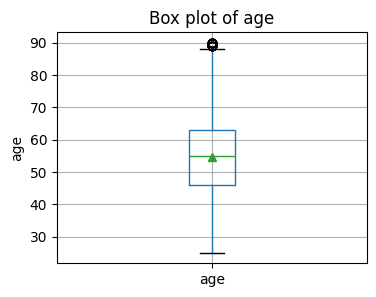

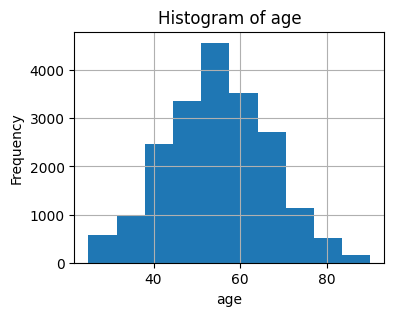

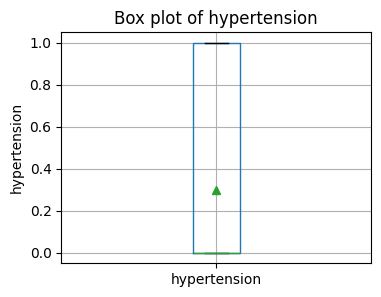

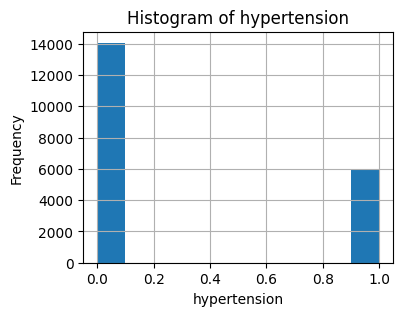

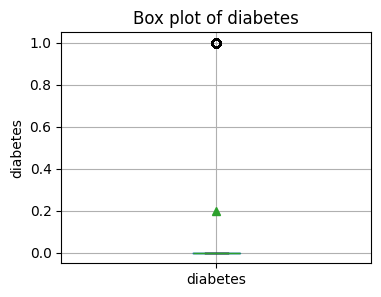

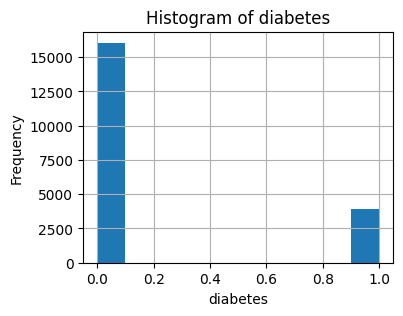

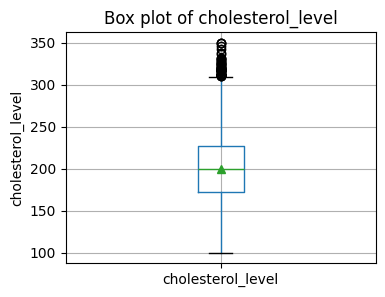

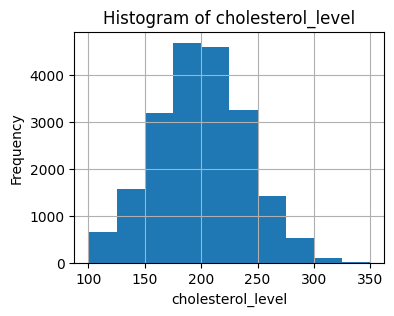

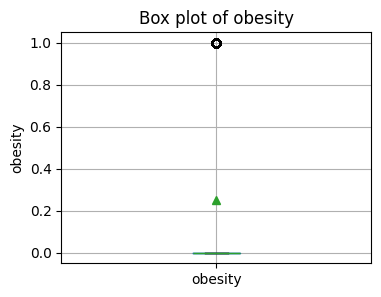

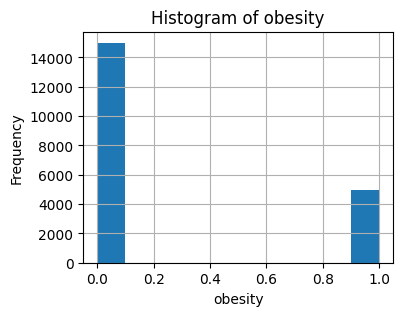

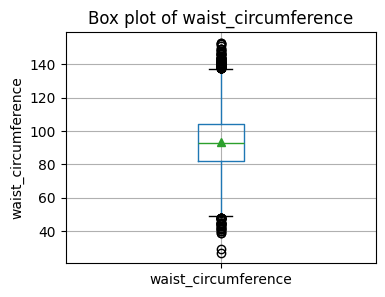

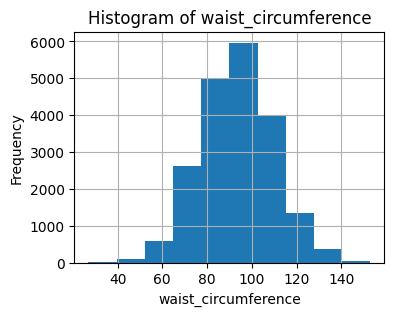

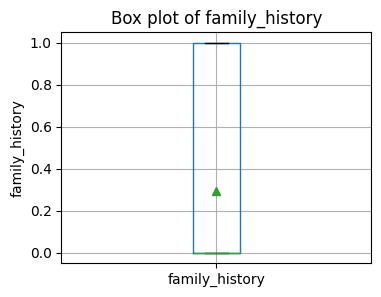

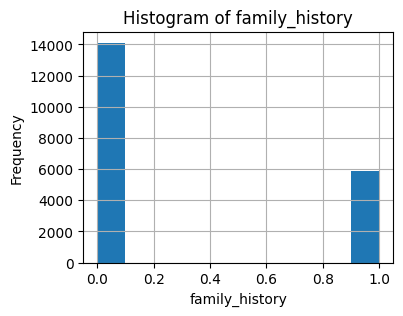

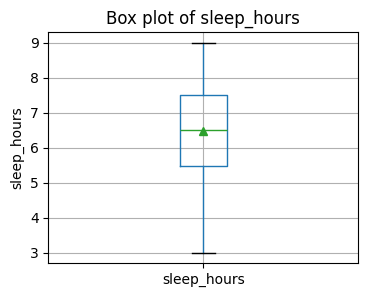

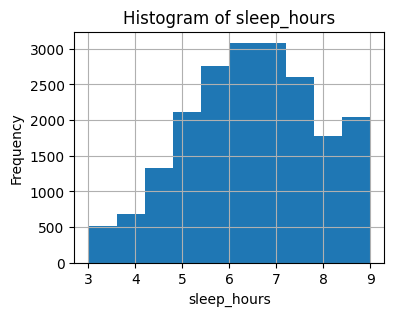

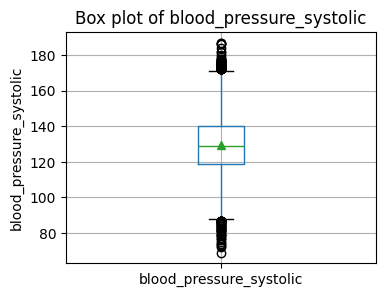

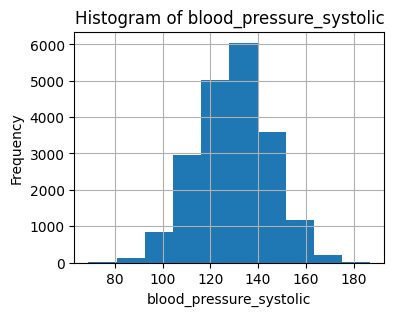

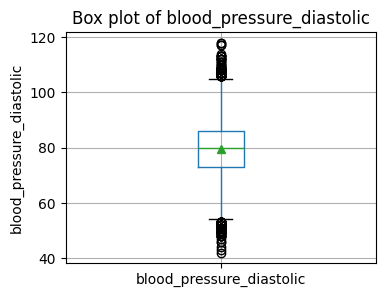

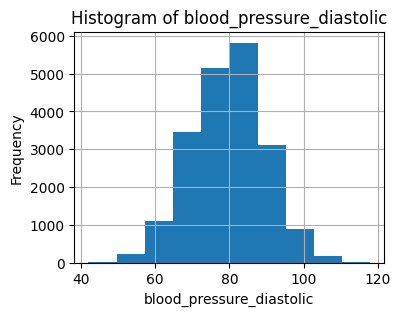

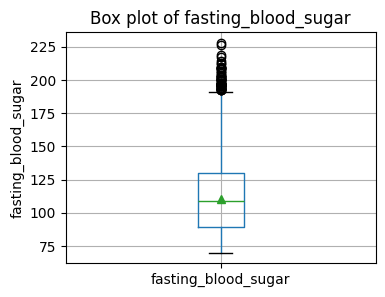

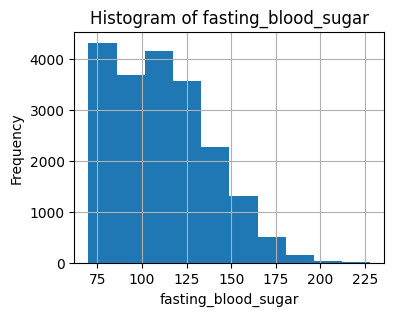

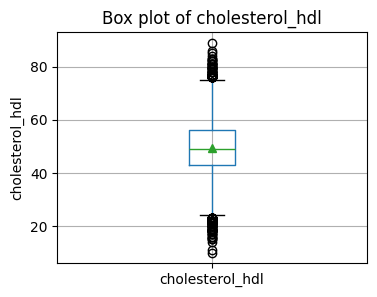

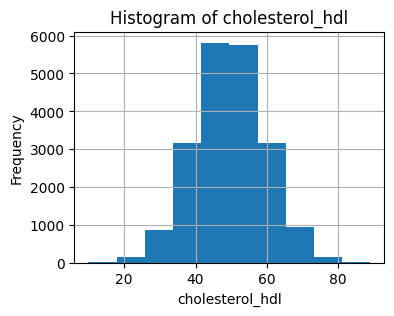

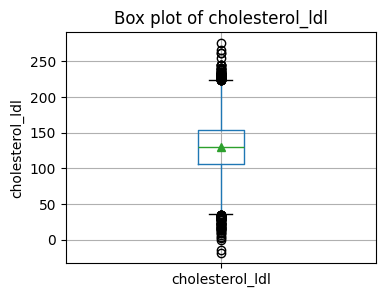

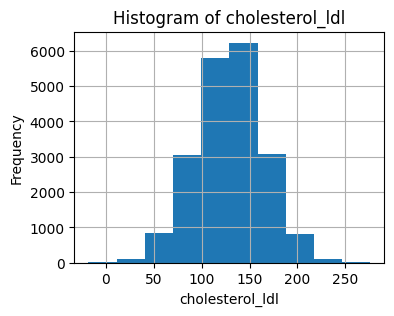

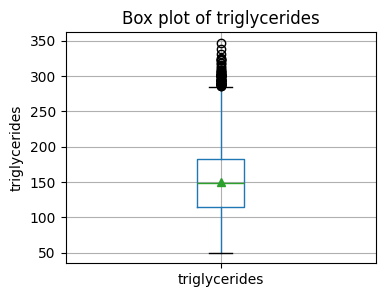

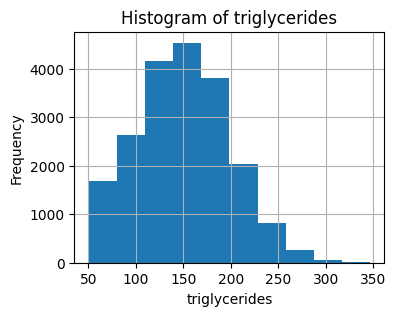

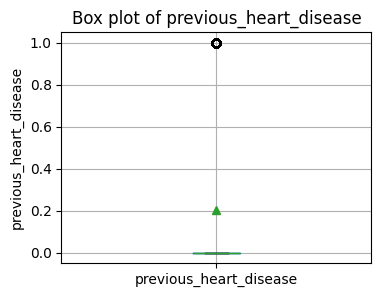

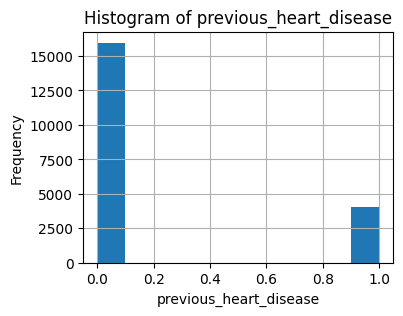

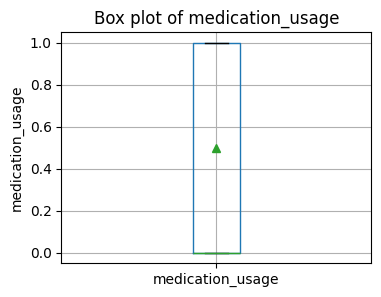

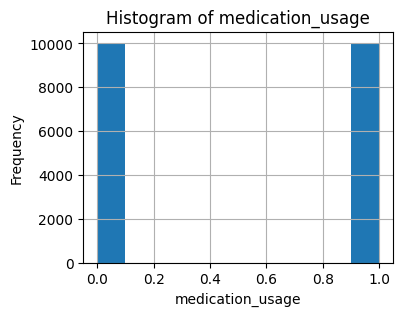

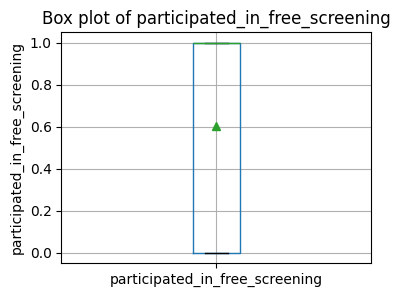

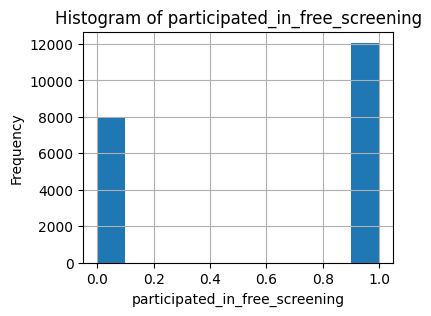

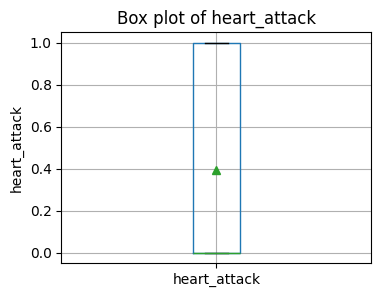

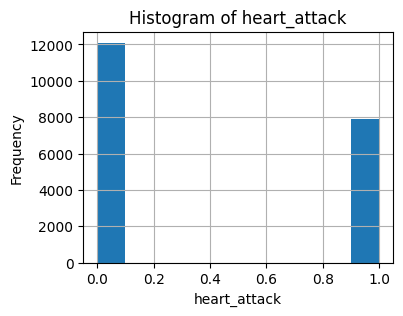

In [5]:
column_names_list = df.columns.tolist()
print("List of column names:", column_names_list)

num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

for column in num_cols:
    # Boxplot
    plt.figure(figsize=(4, 3))
    df.boxplot(
        column=[column],
        meanline=False,
        showmeans=True,
        return_type="dict"
    )
    plt.title(f"Box plot of {column}")
    plt.ylabel(column)
    plt.show()

    # Histogram
    plt.figure(figsize=(4, 3))
    df[column].hist(bins=10)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

## Correlation analysis

Quantifies which individual features have the strongest linear association with the target. Good sanity check that previous_heart_disease, hypertension, etc... matter.

In [14]:
data.corr(method = "pearson", numeric_only=True)

,age,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
age,1.000000,-0.000512,0.003616,-0.003747,-0.001556,0.001601,0.001046,0.000996,-0.001945,0.001823,0.001721,0.002060,0.000313,0.001071,-0.000475,-0.003072,-0.000620,0.105756
hypertension,-0.000512,1.000000,-0.001329,-0.001085,-0.002454,0.000724,0.000391,0.001773,-0.002323,-0.000049,0.001431,-0.000334,-0.000579,0.000362,-0.004754,0.003349,-0.002905,0.269261
diabetes,0.003616,-0.001329,1.000000,-0.001019,0.001720,-0.001773,-0.001133,0.001436,-0.004286,-0.002648,0.002989,0.000479,0.003871,-0.002776,0.000584,0.002031,-0.002566,0.194512
cholesterol_level,-0.003747,-0.001085,-0.001019,1.000000,-0.000630,-0.000419,-0.002900,0.001566,-0.000771,0.001419,-0.001864,0.003067,0.000929,0.000118,-0.004461,0.003451,-0.000869,0.092611
obesity,-0.001556,-0.002454,0.001720,-0.000630,1.000000,0.395426,0.001415,0.003177,0.001068,-0.000498,0.002241,0.001893,-0.001063,-0.001200,-0.001761,-0.004153,-0.003739,0.171720
waist_circumference,0.001601,0.000724,-0.001773,-0.000419,0.395426,1.000000,0.000109,0.002004,0.000340,0.002217,0.003899,-0.002747,-0.000781,0.000694,0.000844,0.000056,-0.002741,0.067883
family_history,0.001046,0.000391,-0.001133,-0.002900,0.001415,0.000109,1.000000,0.001150,-0.000897,0.002180,0.004453,-0.004747,0.002161,-0.000026,0.001014,-0.000015,0.002573,0.001374
sleep_hours,0.000996,0.001773,0.001436,0.001566,0.003177,0.002004,0.001150,1.000000,-0.000589,0.003410,-0.001069,-0.002888,-0.001024,-0.002672,0.002168,0.003941,-0.002101,0.000673
blood_pressure_systolic,-0.001945,-0.002323,-0.004286,-0.000771,0.001068,0.000340,-0.000897,-0.000589,1.000000,-0.002384,-0.001058,-0.005929,0.001367,-0.003280,0.003781,0.000549,0.001929,-0.001644
blood_pressure_diastolic,0.001823,-0.000049,-0.002648,0.001419,-0.000498,0.002217,0.002180,0.003410,-0.002384,1.000000,-0.000854,0.001408,-0.002969,-0.000498,-0.004296,0.002096,0.000923,-0.000301


In [15]:
corr = df.corr(method="pearson", numeric_only=True)

print("Top correlations with target:")
print(corr[TARGET].abs().sort_values(ascending=False).head(10))

Top correlations with target:
heart_attack              1.000000
previous_heart_disease    0.269538
hypertension              0.267508
diabetes                  0.189226
obesity                   0.168322
smoking_status_Current    0.164638
age                       0.106216
cholesterol_level         0.098347
smoking_status_Never      0.089968
fasting_blood_sugar       0.073411
Name: heart_attack, dtype: float64


## Finding errors (or outliers) with bi-variate analysis


In [17]:
# # Let's do regression between a pari of numeric varaibales
# def fit_func(x, a, b):
#     return a*x+b
#
# params = curve_fit(fit_func, data.PIQ,data.FSIQ )  # Here we fit the linear regression and keep the parameters
# print(f"a = {params[0][0]} - b = {params[0][1]}")
#
# # Find errors or outliers
# error = data.FSIQ-[fit_func(x,params[0][0],params[0][1]) for x in data.PIQ]
# print(np.std(error))
# print(error[ error > np.mean(error) + 2 * np.std(error)])
#
# data[data.FSIQ-[fit_func(x,params[0][0],params[0][1]) for x in data.PIQ]==max(data.FSIQ-[fit_func(x,params[0][0],params[0][1]) for x in data.PIQ])]

s## Bi-variate outlier repair - triglycerides vs cholesterol_level

- Medical data are expensive so we are not going to drop missing values...
- We keep each record and correct a wrong values with new ones from closest points.

In [8]:
def lin_fun(x, a, b): return a*x + b
a, b = curve_fit(lin_fun,
                 df["cholesterol_level"],
                 df["triglycerides"])[0]

residuals = df["triglycerides"] - lin_fun(df["cholesterol_level"], a, b)
mask_out = residuals.abs() > 2*residuals.std()

print(f"Replacing {mask_out.sum()} triglyceride outliers by regression prediction")
df.loc[mask_out, "triglycerides"] = lin_fun(df.loc[mask_out, "cholesterol_level"], a, b)


Replacing 986 triglyceride outliers by regression prediction


/var/folders/03/jf9b8_ss5_ngw7_9xgwlnkg40000gn/T/ipykernel_34975/162030199.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[149.47589071 150.13309194 149.88773682 148.95012973 149.41455193
 149.39702656 149.63361901 149.15167144 149.38826388 149.38826388
 148.95889241 149.274349   149.76505925 149.12538339 149.13414607
 149.75629657 149.74753389 149.65114437 149.37073851 149.72124584
 149.73000852 149.16043412 148.88879095 149.37073851 149.48465339
 149.49341608 149.4320773  149.06404461 149.98412633 149.15167144
 149.3269251  149.58104291 149.8964995  149.23053559 150.0016517
 149.72124584 149.20424754 149.58104291 149.20424754 149.25682363
 149.97536365 149.39702656 149.70372047 149.28311168 149.92278755
 149.85268608 150.19443072 148.7573507  149.87897413 149.08156997
 149.41455193 149.07280729 149.97536365 149.74753389 149.70372047
 149.30063705 149.63361901 149.78258462 149.45836535 149.4671280

Scatter matrixes for correlations betwen numeriacal variables 


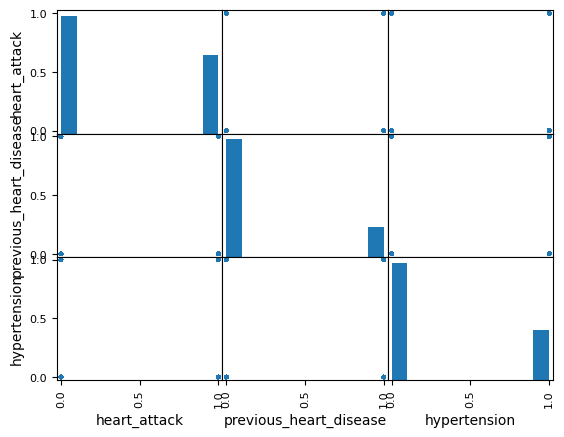

In [19]:
pd.plotting.scatter_matrix(data[['heart_attack', 'previous_heart_disease', 'hypertension']])
# pd.plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])
print('Scatter matrixes for correlations betwen numeriacal variables ')

## Handle missing values

- No missing values in the dataset.
- Only 1 column has missing values but it is not relevant, because column has values called "None" which in pandas means null..


In [9]:
print("Missing cells per column:")
print(df.isna().sum())


Missing cells per column:
age                                   0
gender                                0
region                                0
income_level                          0
hypertension                          0
diabetes                              0
cholesterol_level                     0
obesity                               0
waist_circumference                   0
family_history                        0
smoking_status                        0
alcohol_consumption               12066
physical_activity                     0
dietary_habits                        0
air_pollution_exposure                0
stress_level                          0
sleep_hours                           0
blood_pressure_systolic               0
blood_pressure_diastolic              0
fasting_blood_sugar                   0
cholesterol_hdl                       0
cholesterol_ldl                       0
triglycerides                         0
EKG_results                           0
previous_heart

## Standardise numeric features (z‑score)

For every numeric column *x* we compute

\[
z = \frac{x - \text{mean}(x)}{\text{std}(x)}
\]

so that each feature now has **mean ≈ 0** and **standard deviation≈1**.
This “unit‑variance” scaling prevents variables with large raw ranges
(e.g. cholesterol mg/dL) from swamping small‑range variables (e.g. age years)
inside the Gaussian Naïve Bayes likelihood calculation and improves numerical stability.

In [10]:
for col in num_cols:
    df[col] = (df[col] - df[col].mean()) / df[col].std()


## Encode categorical variables to numeric

Change categorical variables to numeric using one-hot encoding

In [11]:
df = pd.get_dummies(df, columns=cat_cols, dtype=np.int8)


## Save files for future use

To use the preprocessed data in the future

- heart_preprocessed.npz - for Naive Bayes
- heart_preprocessed.csv - any other modifications

In [ ]:
# X = df.drop(columns=[TARGET]).values       # NumPy array for Naive Bayes
# y = df[TARGET].values.astype(np.int8)

# np.savez_compressed("heart_preprocessed_naive_bayes.npz", X=X, y=y)
# df.to_csv("heart_preprocessed_naive_bayes.csv", index=False)

# print("Preprocessing finished")
# print("Final feature matrix shape:", X.shape)


Preprocessing finished
Final feature matrix shape: (20000, 42)
